In [1]:
import mne
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from typing import Dict, Optional, Tuple, Sequence, Iterator

In [2]:
with open("../../0_set_up_and_raw_data/data/subject_numbers.txt") as f:
    subject_numbers = [line.strip() for line in f if line.strip()]

KeyType = Tuple[str, str, str]
    
def condition_keys() -> Iterator[KeyType]:
    for talker in ["S", "T"]:
        for meaning in ["M", "N"]:
            for constraint in ["L", "H"]:
                key = (talker, meaning, constraint)
                yield key
                
def import_eeg_data(subject):
    fp = os.path.join('../data', subject, 'eeg_data_averaged.csv')
    data = pd.read_csv(fp, delimiter = ',')
    return data

def subset_by_condition(data, condition):
    data = data[(data.talker == condition[0]) &
               (data.meaning == condition[1]) &
               (data.constraint == condition[2])]
    return data

def remove_label_vars(data):
    data = data.drop(["talker", "meaning", "constraint", "channel"], axis = 1)
    return data

def get_evoked(data):
    # provide metadata
    sampling_freq = 1000 # in Hertz
    start_time = -.1 # time at beginning of file

    # make MNE object for ERP
    dig = mne.channels.make_standard_montage('GSN-HydroCel-128')
    info = mne.create_info(dig.ch_names, ch_types = 'eeg', sfreq = sampling_freq)
    info.set_montage('GSN-HydroCel-128')
    evoked = mne.EvokedArray(data*1e-6, info, tmin = start_time)

    # low-pass filter at 30 Hz
    evoked.filter(l_freq = None, h_freq = 30.) 
    evoked.crop(tmin = 0.75, tmax = 1.25)
    return evoked

def plot_eeg(evoked):    
    evoked.plot_joint(ts_args = {'gfp': True})

def get_n1(evoked):
    # crop around N1
#     evoked.crop(tmin = 0.75, tmax = 1.25) # crops global var

    # get gfp and n1 max
    gfp = evoked.data
    gfp = np.std(gfp, axis = 0)
    n1_magnitude = np.max(gfp)
    return n1_magnitude

def get_parietal_rms(evoked):
    left_sup_parietal = [53, 54, 61]
    gfp = evoked.data[left_sup_parietal]
    gfp_mean = np.mean(gfp, axis = 0)
    parietal_rms = get_rms(gfp_mean)
    return parietal_rms
    
def get_rms(x):
    rms = np.sqrt(np.mean(x**2))
    return rms

In [3]:
# initialize data frame
df: Dict[str, float] = {
    'subject_number': [],
    'talker': [],
    'meaning': [],
    'constraint': [],
    'n1_magnitude': [],
    'rms': [],
}

# compute n1 magnitude and rms
n1_magnitudes = []
for subject in subject_numbers:
    for condition in condition_keys():
        # get data
        data = import_eeg_data(subject)
        data = subset_by_condition(data, condition)
        data = remove_label_vars(data)
        evoked = get_evoked(data)
        
        # compute stats
        n1_magnitude = get_n1(evoked)
        rms = get_parietal_rms(evoked)
        
        # append to dict
        df['subject_number'].append(subject)
        df['talker'].append(condition[0])
        df['meaning'].append(condition[1])
        df['constraint'].append(condition[2])
        df['n1_magnitude'].append(n1_magnitude)
        df['rms'].append(rms)
        
# convert dict to pd dataframe
df = pd.DataFrame(df)

Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 441 samples (0.441 sec)

Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 441 samples (0.441 sec)

Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwi


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 441 samples (0.441 sec)

Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 441 samples (0.441 sec)

Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firw


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 441 samples (0.441 sec)

Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 441 samples (0.441 sec)

Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firw


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 441 samples (0.441 sec)

Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 441 samples (0.441 sec)

Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firw


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 441 samples (0.441 sec)

Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 441 samples (0.441 sec)

Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firw

F_onewayResult(statistic=0.406208087021577, pvalue=0.8443069508336942)

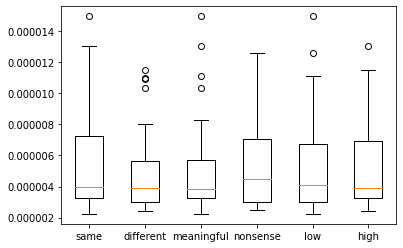

In [5]:
"""
N1 magnitude by condition
"""

average_over_subjects
df_n1 = {'same': df.n1_magnitude[df.talker == "S"],
         'different': df.n1_magnitude[df.talker == "T"],
         'meaningful': df.n1_magnitude[df.meaning == "M"],
         'nonsense': df.n1_magnitude[df.meaning == "N"],
         'low': df.n1_magnitude[df.constraint == "L"],
         'high': df.n1_magnitude[df.constraint == "H"]}
fig1, ax1 = plt.subplots()
ax1.boxplot(df_n1.values())
ax1.set_xticklabels(df_n1.keys())

# ANOVA
stats.f_oneway(df_n1['same'], 
               df_n1['different'], 
               df_n1['meaningful'], 
               df_n1['nonsense'], 
               df_n1['low'], 
               df_n1['high'])

F_onewayResult(statistic=0.9423735971707119, pvalue=0.4540426827504578)

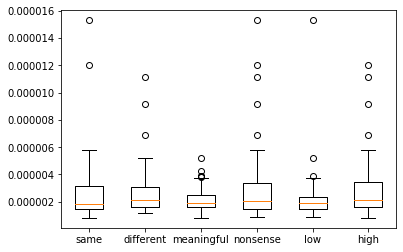

In [6]:
"""
Parietal RMS by condition
"""
df_rms = {'same': df.rms[df.talker == "S"],
          'different': df.rms[df.talker == "T"],
          'meaningful': df.rms[df.meaning == "M"],
          'nonsense': df.rms[df.meaning == "N"],
          'low': df.rms[df.constraint == "L"],
          'high': df.rms[df.constraint == "H"]}
fig2, ax2 = plt.subplots()
ax2.boxplot(df_rms.values())
ax2.set_xticklabels(df_rms.keys())

# ANOVA
stats.f_oneway(df_rms['same'], 
               df_rms['different'], 
               df_rms['meaningful'], 
               df_rms['nonsense'], 
               df_rms['low'], 
               df_rms['high'])

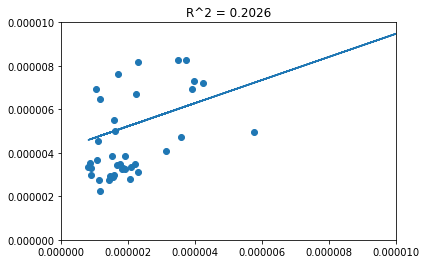

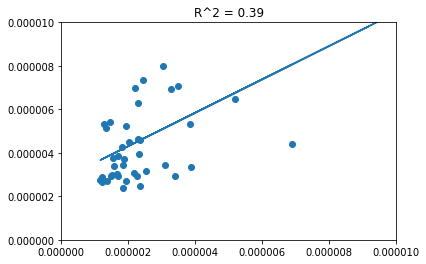

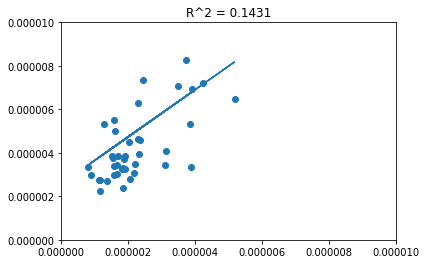

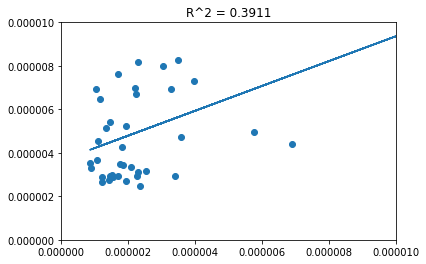

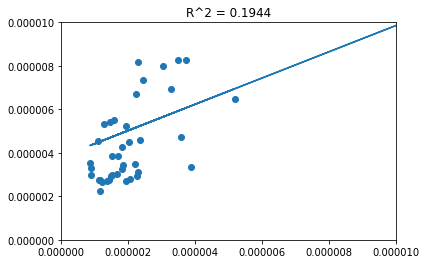

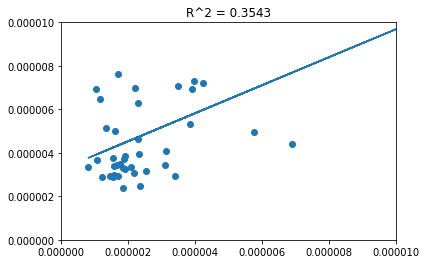

In [10]:
"""
Relationship between N1 magnitude and Parietal RMS
"""
def get_x_y(condition):
    x = df_rms[condition].to_numpy()
    x = x.reshape(-1, 1)
    y = df_n1[condition].to_numpy()
    y = y.reshape(-1, 1)
    return x, y

def get_lin_reg(x, y):
    reg = LinearRegression().fit(x, y)
    (rsq, b, m) = (reg.score(x, y), reg.intercept_, reg.coef_)
    return rsq, b, m

def plot_scatter(x, y, rsq, b, m):
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.plot(x, m*x + b)
    plt.xlim([0, 0.000010])
    plt.ylim([0, 0.000010])
    plt.title("R^2 = " + str(round(rsq, 4)))
    
conditions = ["same", "different", "meaningful", "nonsense", "low", "high"]
for condition in conditions:
    (x, y) = get_x_y(condition)
    (rsq, b, m) = get_lin_reg(x, y)
    plot_scatter(x, y, rsq, b, m)